#### Background substraction
La sustracción de fondo (BS) es una técnica común y ampliamente utilizada para generar una máscara 
de primer plano (es decir, una imagen binaria que contiene los píxeles que pertenecen a los objetos
en movimiento en la escena) mediante el uso de cámaras estáticas.
Como su nombre indica, BS calcula la máscara de primer plano realizando una resta entre el fotograma
actual y un modelo de fondo, que contiene la parte estática de la escena o, más en general, todo lo 
que se puede considerar como fondo dadas las características de la escena observada.

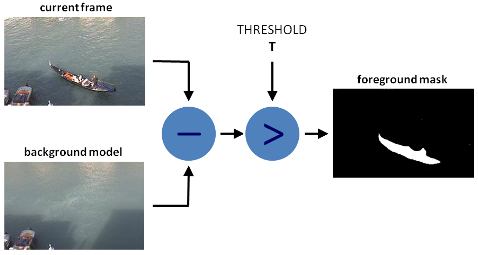

El modelado de fondo consta de dos pasos principales:

- Inicialización en segundo plano;
- Actualización de antecedentes.

En el primer paso se calcula un modelo inicial del fondo, mientras que en el segundo paso se actualiza ese modelo para adaptarse a posibles cambios en la escena.


In [2]:
import cv2 as cv

#### Elegimos el algoritmo de segmentación de fondo/primer plano

__MOG2:__ Es un algoritmo de segmentación de fondo/primer plano basado en una mezcla de gaussianas. Se basa en dos artículos de Z.Zivkovic, "Improved adaptive Gausian mixture model for background subtraction" de 2004 y "Efficient Adaptive Density Estimation per Image Pixel for the Task of Background Subtraction" de 2006. Una característica importante de este algoritmo es que selecciona el número apropiado de distribución gaussiana para cada píxel. Proporciona una mejor adaptabilidad a diferentes escenas debido a cambios de iluminación, etc.

- El modelo de mezcla gaussiana es una categoría del modelo probabilístico que establece que todos los puntos de datos generados se derivan de una mezcla de distribuciones gaussianas finitas .

- MOG utiliza un método para modelar cada píxel de fondo mediante una mezcla de distribuciones K gaussianas (K es de 3 a 5). MOG2 selecciona el número apropiado de gaussianas para cada pixel automáticamente (también permite, o no, detectar sombras).

- Los pesos de la mezcla representan la cantidad de tiempo que esos colores estuvieron presentes en la escena.

- Los colores de fondo probables son los que permanecen por más tiempo y más estáticos en la escena.

__KNN:__ Es un algoritmo de segmentación de fondo/primer plano basado en K-NN.Es un método de análisis de clústers cuyo objetivo es dividir n observaciones en k clústers donde cada observación pertenece al clúster con la media más cercana.

Buen ejemplo de comportamiento entre algoritmos:<br>

https://www.youtube.com/watch?reload=9&v=M6yUlAhxBxk
https://github.com/AhadCove/Background-Subtractor-Comparisons

In [3]:
#metodo = 'MOG2'
metodo = 'KNN'
if metodo == 'MOG2':
    backSub = cv.createBackgroundSubtractorMOG2()
else:
    backSub = cv.createBackgroundSubtractorKNN()
    backSub = cv.createBackgroundSubtractorKNN(detectShadows = True)

#### Corremos la sustracción de fondo

In [8]:
# Abrimos el archivo
#-------------------
filename = 'vtest.avi'
capture = cv.VideoCapture(filename)

if not capture.isOpened:
    print('Falla al abrir el archivo: ' + filename)
    exit(0)

# Corremos la sustraccion
#------------------------
while True:
    # Leemos un frame
    ret, frame = capture.read()
    if frame is None:
        break
    
    # Aplicamos la sustracción al frame leído
    #----------------------------------------
    # Cada frame se utiliza tanto para calcular la máscara de primer plano como para actualizar el fondo.
    # Si se desea cambiar la tasa de aprendizaje utilizada para actualizar el modelo de fondo, es posible
    # establecer una tasa de aprendizaje específica pasando un parámetro al método apply.
    fgMask = backSub.apply(frame)
    
    # Escribimos sobre la imagen el número de frame procesado
    cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
               cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    # mostramos frame original e imagen binaria background/foreground
    cv.imshow('Frame', frame)
    cv.imshow('FG Mask', fgMask)
    
    # Corresmos hasta que termine o apriete escape
    keyboard = cv.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

cv.destroyAllWindows()
capture.release()